week 1 assignment



In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
import os
import zipfile
import shutil
from PIL import Image
import numpy as np

In [14]:
zip_path = "/content/drive/MyDrive/datasets/archive.zip"
extract_dir = "/content/drive/MyDrive/datasets/"

In [24]:
import os
print(os.listdir("/content/drive/MyDrive/datasets"))


['archive.zip', 'DATASET']


In [9]:
import os

print("Level 1:", os.listdir("/content/drive/MyDrive/datasets/DATASET"))
print("Level 2:", os.listdir("/content/drive/MyDrive/datasets/DATASET/DATASET"))


Level 1: ['DATASET', 'dataset']
Level 2: ['TEST', 'TRAIN']


In [15]:
if not os.path.exists(os.path.join(extract_dir, "DATASET")):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print("✅ Dataset extracted successfully!")
else:
    print("⚡ Dataset already extracted!")

⚡ Dataset already extracted!


In [16]:
for folder in os.listdir(extract_dir):
    print("📁", folder)
    folder_path = os.path.join(extract_dir, folder)
    if os.path.isdir(folder_path):
        print("   Subfolders:", os.listdir(folder_path))

📁 archive.zip
📁 DATASET
   Subfolders: ['DATASET', 'dataset']


In [25]:
import zipfile
zip_path = "/content/drive/MyDrive/datasets/archive.zip"
zipfile.ZipFile(zip_path).extractall("/content/drive/MyDrive/datasets/")


In [27]:
import os
print(os.listdir("/content/drive/MyDrive/datasets"))


['archive.zip', 'DATASET', 'dataset']


week 3 work


In [30]:
import os
print(os.listdir("/content/waste_dataset"))
import os

print("Inside DATASET folder:", os.listdir("/content/waste_dataset/DATASET"))
print("Inside dataset folder:", os.listdir("/content/waste_dataset/dataset"))

['DATASET', 'dataset']
Inside DATASET folder: ['TRAIN', 'TEST']
Inside dataset folder: ['DATASET']


In [29]:
import zipfile
zip_path = "/content/drive/MyDrive/datasets/archive.zip"
extract_dir = "/content/waste_dataset"

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Dataset extracted successfully to /content/waste_dataset!")

✅ Dataset extracted successfully to /content/waste_dataset!


In [31]:
import os

train_dir = "/content/waste_dataset/DATASET/TRAIN"
test_dir = "/content/waste_dataset/DATASET/TEST"

print("Train categories:", os.listdir(train_dir))
print("Test categories:", os.listdir(test_dir))


Train categories: ['O', 'R']
Test categories: ['O', 'R']


In [32]:
import os

train_dir = "/content/waste_dataset/DATASET/TRAIN"
test_dir = "/content/waste_dataset/DATASET/TEST"

for cat in os.listdir(train_dir):
    path = os.path.join(train_dir, cat)
    print(cat, ":", len(os.listdir(path)), "images (Train)")

for cat in os.listdir(test_dir):
    path = os.path.join(test_dir, cat)
    print(cat, ":", len(os.listdir(path)), "images (Test)")


O : 12565 images (Train)
R : 9999 images (Train)
O : 1401 images (Test)
R : 1112 images (Test)


In [19]:
data_dir = "/content/waste_dataset/DATASET/TRAIN"


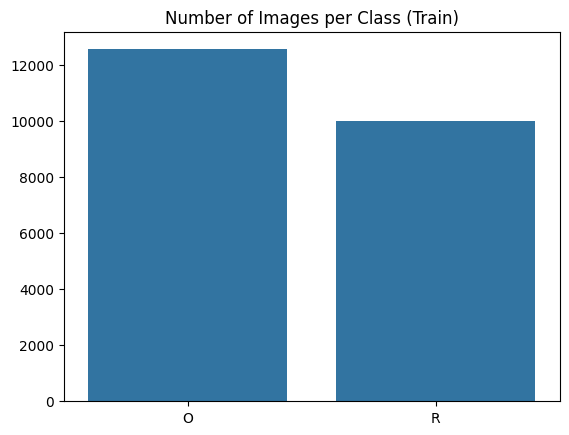

Samples from class: O


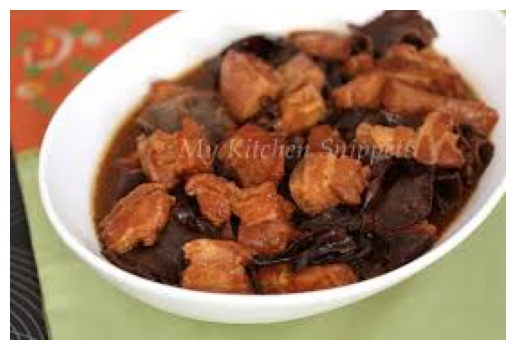

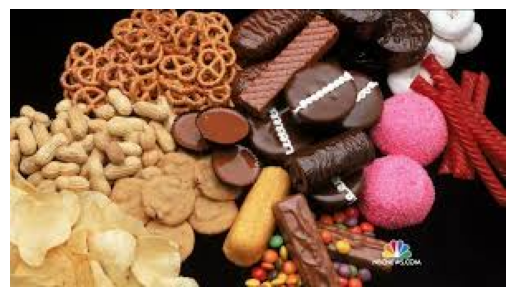

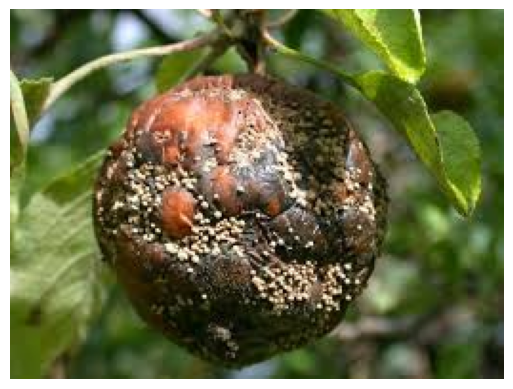

Samples from class: R


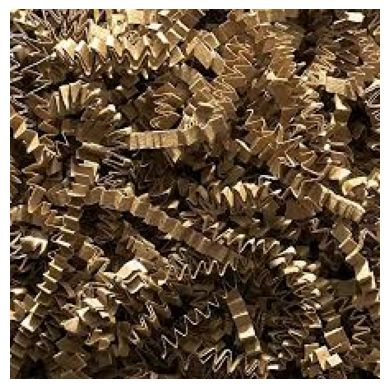

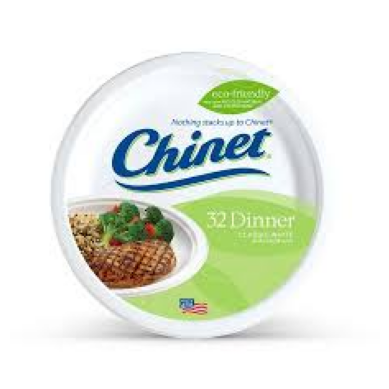

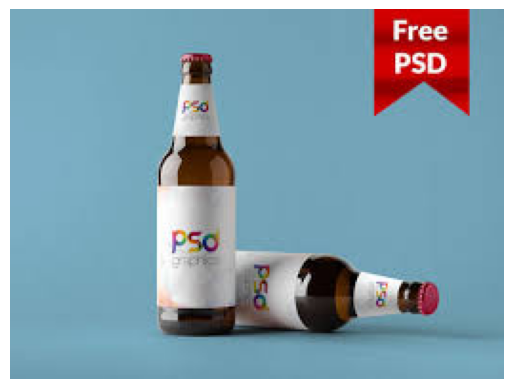

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Count images per class
counts = {cat: len(os.listdir(os.path.join(data_dir, cat))) for cat in os.listdir(data_dir)}
sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.title("Number of Images per Class (Train)")
plt.show()

# Show 3 sample images from each class
for cat in os.listdir(data_dir):
    path = os.path.join(data_dir, cat)
    files = os.listdir(path)[:3]
    print(f"Samples from class: {cat}")
    for f in files:
        img = Image.open(os.path.join(path, f))
        plt.imshow(img)
        plt.axis("off")
        plt.show()


week 2 task

In [34]:
from PIL import Image
import os, hashlib

# Paths
train_dir = "/content/waste_dataset/DATASET/TRAIN"
test_dir = "/content/waste_dataset/DATASET/TEST"
processed_dir = "/content/processed_data"

# Create new folders
for split in ["TRAIN", "TEST"]:
    for cat in os.listdir(os.path.join(train_dir if split=="TRAIN" else test_dir)):
        os.makedirs(os.path.join(processed_dir, split, cat), exist_ok=True)

# Helper to check duplicates
hashes = {}

def process_images(src_dir, dst_dir):
    corrupted = []
    duplicates = []
    for split in ["TRAIN", "TEST"]:
        base = train_dir if split=="TRAIN" else test_dir
        for cat in os.listdir(base):
            src_path = os.path.join(base, cat)
            dst_path = os.path.join(dst_dir, split, cat)

            for f in os.listdir(src_path):
                if not f.lower().endswith(('.png','.jpg','.jpeg')):
                    continue
                src = os.path.join(src_path, f)
                dst = os.path.join(dst_path, f)

                try:
                    # Check duplicates
                    with open(src, 'rb') as fh:
                        filehash = hashlib.md5(fh.read()).hexdigest()
                    if filehash in hashes:
                        duplicates.append(src)
                        continue
                    else:
                        hashes[filehash] = src

                    # Open, resize, save
                    im = Image.open(src).convert("RGB")
                    im = im.resize((224,224))
                    im.save(dst, "JPEG", quality=90)

                except Exception as e:
                    corrupted.append((src, str(e)))
    return corrupted, duplicates

# Run processing
corrupted, duplicates = process_images(train_dir, processed_dir)

print("✅ Processing complete.")
print("Corrupted files found:", len(corrupted))
print("Duplicate files skipped:", len(duplicates))
print("Processed data saved in:", processed_dir)


✅ Processing complete.
Corrupted files found: 0
Duplicate files skipped: 326
Processed data saved in: /content/processed_data


In [35]:
# 3 — Imports
from PIL import Image
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import hashlib

sns.set()
print('Imports OK')


Imports OK


     class  count
0  DATASET      0
1  dataset      0


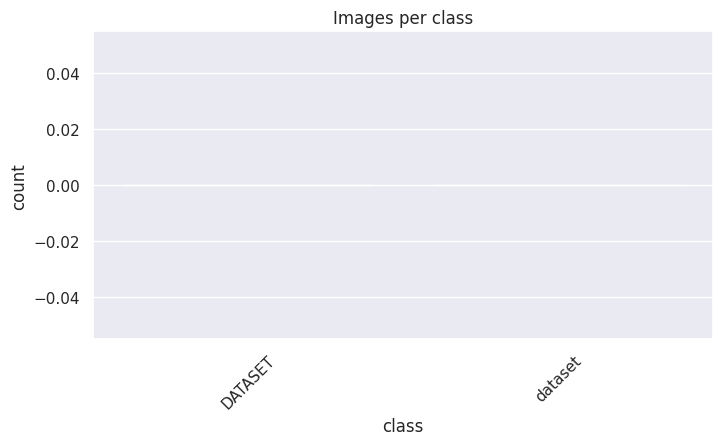

In [38]:

counts = {}
for cat in categories:
    p = os.path.join(data_dir, cat)
    files = [f for f in os.listdir(p) if f.lower().endswith(('.png','.jpg','.jpeg'))]
    counts[cat] = len(files)
counts_df = pd.DataFrame(list(counts.items()), columns=['class','count']).sort_values('count', ascending=False)
print(counts_df)
plt.figure(figsize=(8,4))
sns.barplot(x='class', y='count', data=counts_df)
plt.title('Images per class')
plt.xticks(rotation=45)
plt.show()


In [39]:

def show_samples(data_dir, categories, samples_per_class=3, img_size=(256,256)):
    plt.figure(figsize=(samples_per_class*3, len(categories)*3))
    i=1
    for cat in categories:
        p = os.path.join(data_dir, cat)
        imgs = [f for f in os.listdir(p) if f.lower().endswith(('.png','.jpg','.jpeg'))][:samples_per_class]
        for img in imgs:
            img_path = os.path.join(p,img)
            try:
                im = Image.open(img_path).convert('RGB')
                im = im.resize(img_size)
                plt.subplot(len(categories), samples_per_class, i)
                plt.imshow(im)
                plt.axis('off')
                if i % samples_per_class == 1:
                    plt.title(cat)
                i += 1
            except Exception as e:
                print('Error reading', img_path, e)
    plt.tight_layout()
    plt.show()

show_samples(data_dir, categories, samples_per_class=3)


<Figure size 900x600 with 0 Axes>

In [42]:

sizes = []
for cat in categories:
    p = os.path.join(data_dir, cat)
    for f in os.listdir(p):
        if f.lower().endswith(('.png','.jpg','.jpeg')):
            try:
                with Image.open(os.path.join(p,f)) as im:
                    sizes.append(im.size)  # (width, height)
            except Exception:
                pass
sizes_arr = np.array(sizes)
if sizes_arr.size == 0:
    print('No images found or all images are corrupted. Check your dataset path.')
else:
    widths, heights = sizes_arr[:,0], sizes_arr[:,1]
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.hist(widths, bins=30)
    plt.title('Width distribution')
    plt.subplot(1,2,2)
    plt.hist(heights, bins=30)
    plt.title('Height distribution')
    plt.show()


No images found or all images are corrupted. Check your dataset path.


In [41]:

!unzip "/content/drive/MyDrive/datasets/archive.zip" -d /content/waste_dataset



Streaming output truncated to the last 5000 lines.
  inflating: /content/waste_dataset/dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: /content/waste_dataset/dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: /content/waste_dataset/dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: /content/waste_dataset/dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: /content/waste_dataset/dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: /content/waste_dataset/dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: /content/waste_dataset/dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: /content/waste_dataset/dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: /content/waste_dataset/dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: /content/waste_dataset/dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: /content/waste_dataset/dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: /content/waste_dataset/dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: /content/waste_dataset/dataset/DATASET/TRAIN/R/R_5509.jpg  
  i